# Loan Approval Prediction 

Your dataset contains 32581 rows with 12 columns.\
Details of each atrribute in the dataset:

This dataset contains 12 columns:\
<b>person_age</b>: The age of the person (numerical).\
<b>person_income</b>: The income of the person (numerical).\
<b>person_home_ownership</b>: The type of home ownership (categorical, e.g., Rent, Own).\
<b>person_emp_length</b>: The years of employment (numerical, or could be categorical if values are binned).\
<b>loan_intent</b>: The intent of the loan (categorical, e.g., Personal, Business).\
<b>loan_grade</b>: The loan grade (categorical, possibly A, B, C, etc.).\
<b>loan_amnt</b>: The amount of the loan (numerical).\
<b>loan_int_rate</b>: The interest rate of the loan (numerical).\
<b>loan_status</b>: Whether the loan was approved or not (binary: Approved/Denied or 1/0).\
<b>loan_percent_income</b>: The percentage of income requested in the loan (numerical).\
<b>cb_person_default_on_file</b>: Whether the person has defaulted before (binary: 1 = Yes, 0 = No).\
<b>cb_person_cred_hist_length</b>: The length of the person’s credit history (numerical).

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer, StandardScaler, OneHotEncoder

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report , confusion_matrix

In [7]:
import joblib

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
from sklearn.svm import SVC

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from xgboost import XGBClassifier

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [149]:
from sklearn.metrics import roc_curve, auc

In [16]:
df = pd.read_csv('/Users/ninads/Downloads/credit_risk_dataset.csv') 

In [17]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [18]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [20]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


<b>df.describe()</b>: provides a summary of numerical columns, including count, mean, std, min, max, and percentiles. 

In [21]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [22]:
df.duplicated().sum()

165

In [23]:
df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [26]:
df['person_emp_length'] = df['person_emp_length'].fillna(df['person_emp_length'].mean())

In [27]:
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].mean())

In [28]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [29]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

<b>Numerical columns</b>: person_age, person_income, person_emp_length, loan_amnt, loan_int_rate, loan_status, loan_percent_income, cb_person_cred_hist_length\
<b>Categorical Columns</b>: person_home_ownership, loan_intent, loan_grade, cb_person_default_on_file'


In [30]:
df=df.copy()

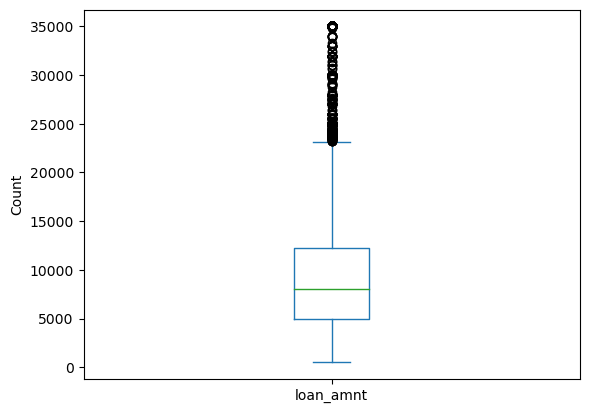

In [31]:
df['loan_amnt'].plot.box()
plt.ylabel('Count')
plt.show()

In [32]:
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['loan_amnt'] >= lower_bound) & (df['loan_amnt'] <= upper_bound)]

Outliers are removed from loan_amnt column.\
Calculates Q1 and Q3 — the 25th and 75th percentiles of loan_amnt.\
Computes IQR — the difference between Q3 and Q1.\
Sets lower and upper bounds — anything outside this range is an outlier.\
Filters the dataframe — keeps only the data within [lower_bound, upper_bound].

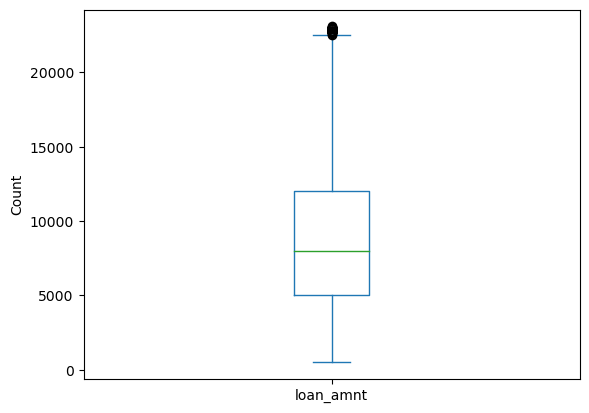

In [33]:
df['loan_amnt'].plot.box()
plt.ylabel('Count')
plt.show()

<Axes: xlabel='person_income', ylabel='Count'>

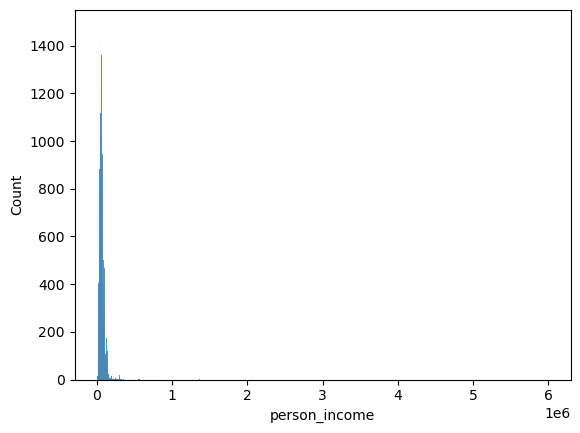

In [34]:
sns.histplot(df['person_income'])

In [35]:
df['person_income'] = np.log1p(df['person_income'])  

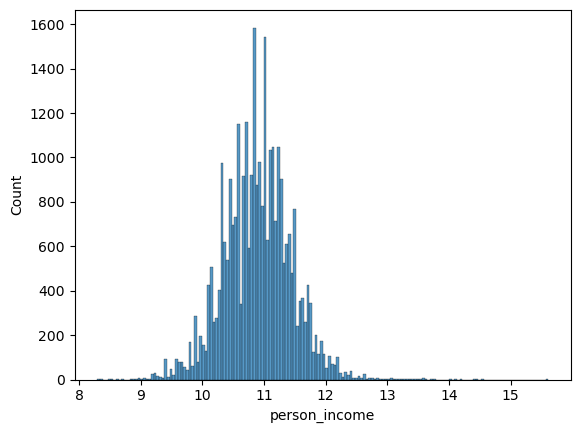

In [36]:
sns.histplot(df['person_income'])
plt.show()

After applying np.log1p(df['person_income']):\
Large values got compressed.\
Small values were barely changed.\
Now incomes are more normally distributed (centered around 10–12 range).

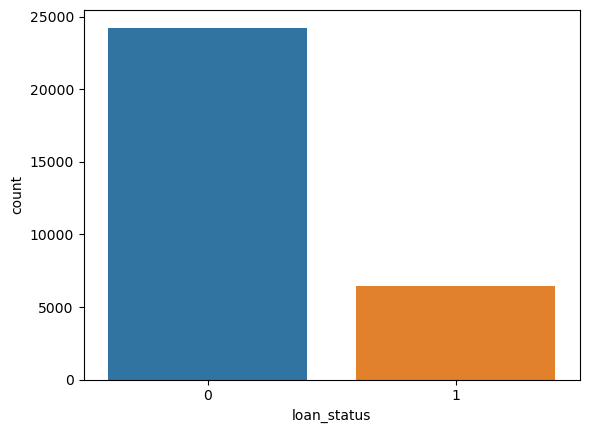

In [37]:
sns.countplot(x='loan_status', data=df)
plt.show()


In [38]:
df['loan_status']=df['loan_status'].map({0:"No", 1:"Yes"})

Converting 0 and 1 using map function\
0 ➔ 'No' (loan not approved)\
1 ➔ 'Yes' (loan approved)

In [39]:
loan_intent_status = df.groupby(['loan_intent', 'loan_status']).size().reset_index(name='count')

Groups your data based on:\
loan_intent (loan purpose)\
loan_status (approved or not)

In [40]:
loan_intent_status.index

RangeIndex(start=0, stop=12, step=1)

In [41]:
loan_intent_status.values

array([['DEBTCONSOLIDATION', 'No', 3571],
       ['DEBTCONSOLIDATION', 'Yes', 1345],
       ['EDUCATION', 'No', 5083],
       ['EDUCATION', 'Yes', 1015],
       ['HOMEIMPROVEMENT', 'No', 2498],
       ['HOMEIMPROVEMENT', 'Yes', 861],
       ['MEDICAL', 'No', 4274],
       ['MEDICAL', 'Yes', 1474],
       ['PERSONAL', 'No', 4199],
       ['PERSONAL', 'Yes', 1003],
       ['VENTURE', 'No', 4631],
       ['VENTURE', 'Yes', 783]], dtype=object)

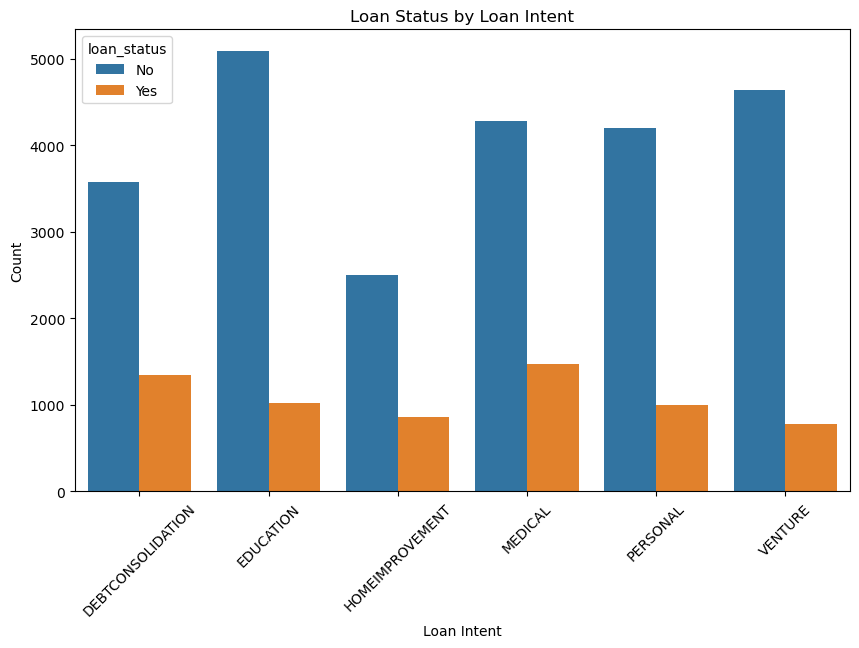

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x='loan_intent', y='count', hue='loan_status',  data=loan_intent_status)
plt.xticks(rotation=45)
plt.title('Loan Status by Loan Intent')
plt.xlabel('Loan Intent')
plt.ylabel('Count')
plt.show()

Observation:\
➔ Debt Consolidation loans have more approvals (blue bars higher than orange).\
➔ Home Improvement loans have fewer approvals compared to others.

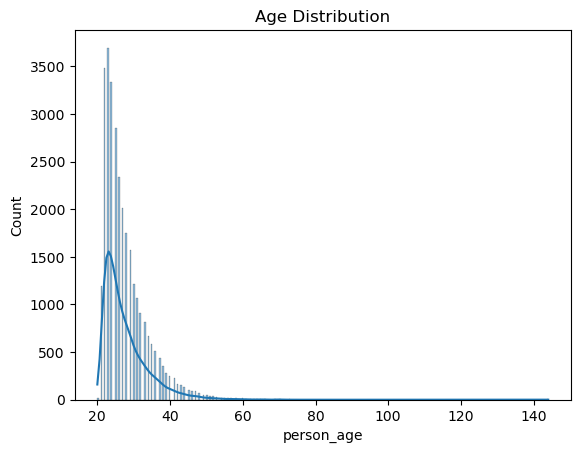

In [43]:
sns.histplot(df['person_age'], kde=True)
plt.title('Age Distribution')
plt.show()


In [44]:
df['person_income'].values

array([ 9.16962254,  9.16962254,  9.20039104, ..., 11.69525536,
       11.91839724, 10.64544871])

In [45]:
df['loan_amnt'].values

array([ 1000,  5500,  2500, ..., 17625, 15000,  6475])

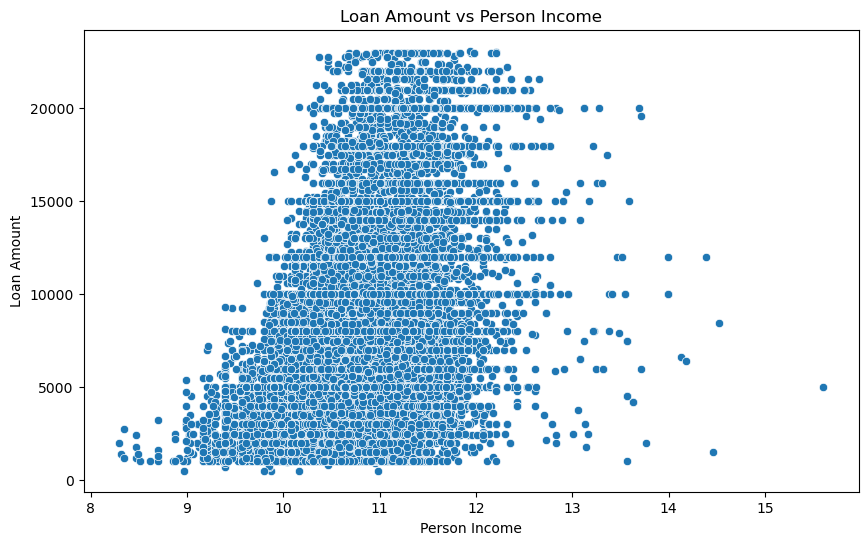

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='person_income', y='loan_amnt',alpha=1.0)
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Person Income')
plt.show()


Observations:\
As income increases, the loan amount generally increases too, but not in a very strong linear pattern.\
The majority of data points are between:\
Income: log-scaled between ~9.5 and 12.\
Loan Amount: around 5,000 to 20,000.



In [47]:
df['person_age'].values

array([21, 25, 21, ..., 54, 56, 66])

In [48]:
df['loan_status'].values

array(['No', 'Yes', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [49]:
age=df['person_age'].head()
age

1     21
2     25
5     21
9     21
11    21
Name: person_age, dtype: int64

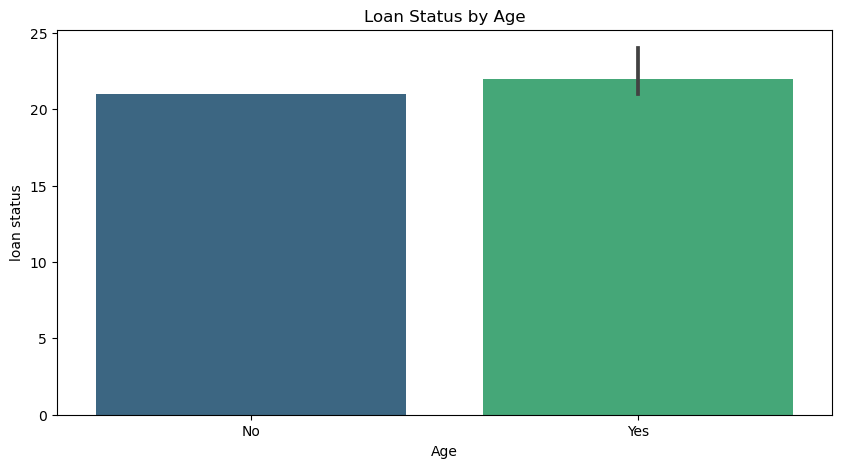

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['loan_status'], y=age, palette="viridis") 
plt.title("Loan Status by Age")
plt.xlabel("Age")
plt.ylabel("loan status")
plt.show()

Observations:\
This plot shows the average age of individuals grouped by their loan status (Yes or No)\
Individuals who were approved for loans ("Yes") have a slightly higher average age than those who were not approved ("No").

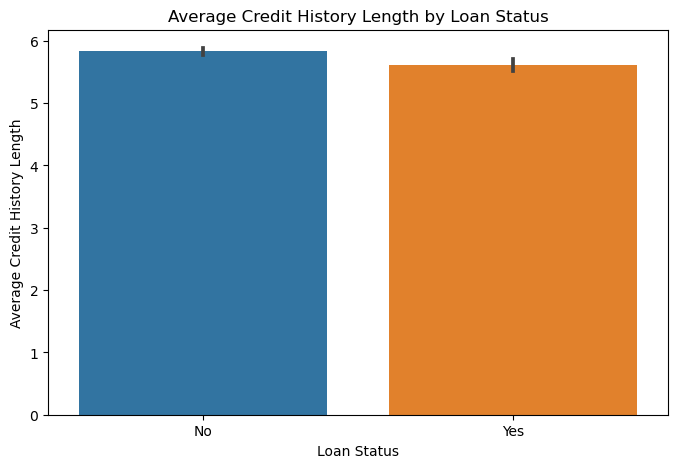

In [141]:
plt.figure(figsize=(8,5))
sns.barplot(x='loan_status', y='cb_person_cred_hist_length', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Average Credit History Length')
plt.title('Average Credit History Length by Loan Status')
plt.show()


Observations:\
This plot shows the average credit history length of individuals grouped by loan status (No or Yes):\
Applicants who were not approved for loans ("No") have a slightly longer credit history on average compared to those who were approved ("Yes").

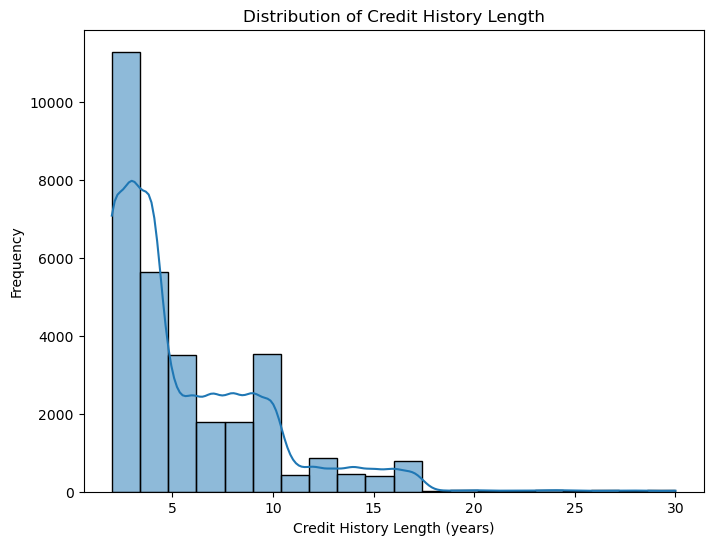

In [52]:
plt.figure(figsize=(8,6))
sns.histplot(df['cb_person_cred_hist_length'], bins=20, kde=True)
plt.xlabel('Credit History Length (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Credit History Length')
plt.show()


Observaions:\
The distribution is right-skewed (positively skewed):\
A large majority of applicants have short credit histories, mostly between 2 to 5 years.\
As credit history length increases, the number of applicants drops sharply.\
Only a small number of individuals have a credit history exceeding 10 years.

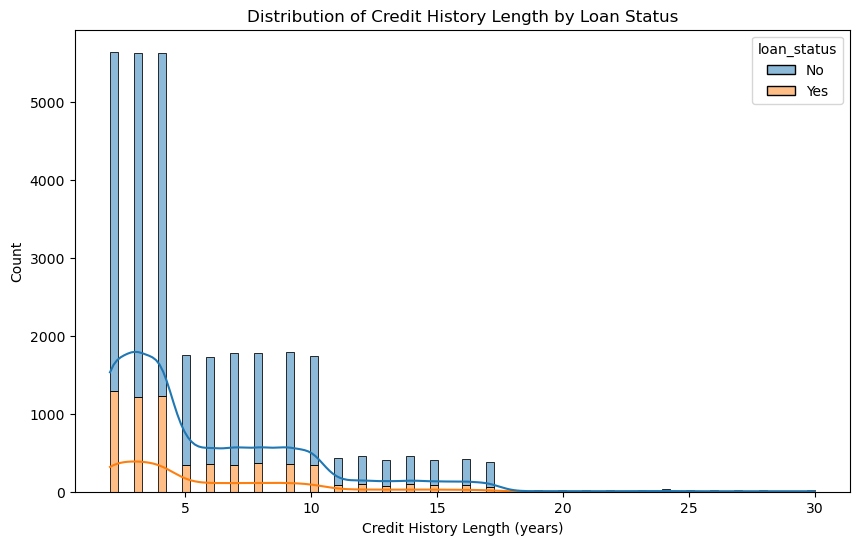

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='cb_person_cred_hist_length', hue='loan_status', kde=True, multiple='stack')
plt.xlabel('Credit History Length (years)')
plt.title('Distribution of Credit History Length by Loan Status')
plt.show()


This plot shows the distribution of credit history length grouped by loan status \
A high concentration of defaults (blue bars) is seen when credit history length is between 2 to 6 years.\
The successful repayments (orange bars) are also more common among applicants with short credit histories.\
As credit history length increases (beyond ~10 years), the number of defaults drops significantly..
This supports the idea that longer credit histories correlate with better repayment behavior.

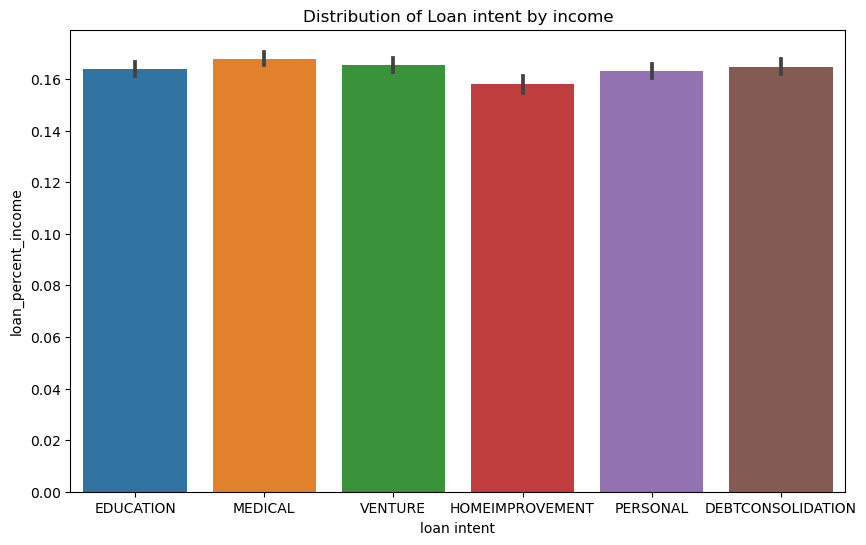

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_intent', y='loan_percent_income', data=df)
plt.xlabel('loan intent')
plt.ylabel('loan_percent_income')
plt.title('Distribution of Loan intent by income')
plt.show()

Observations:\
The highest ratio is for MEDICAL loans, while the lowest is for HOMEIMPROVEMENT.\
Other intents like EDUCATION, VENTURE, PERSONAL, and DEBTCONSOLIDATION are quite close in value.


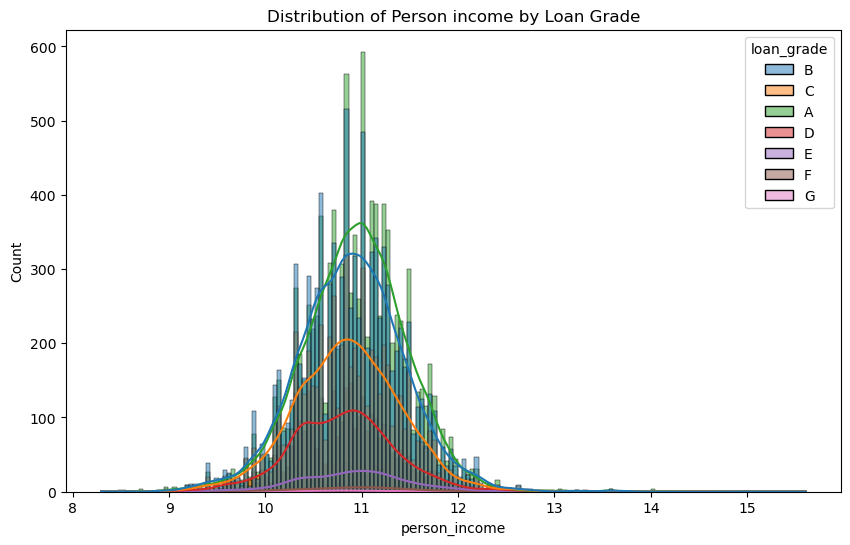

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='person_income', hue='loan_grade', kde=True)
plt.xlabel('person_income')
plt.ylabel('Count')
plt.title('Distribution of Person income by Loan Grade')
plt.show()

Observations:\
This combined histogram and KDE plot shows how person_income is distributed across various loan_grade categories.\
Loan Grades A, B, and C dominate the distribution.\
These grades cluster tightly around log(person_income) ≈ 11,\
Grade A (green) is slightly skewed toward higher incomes compared to B and C.\
  Lower grades (D, E, F, G) are less frequent and shift slightly left\
These grades correspond to lower income levels, especially Grades F and G.\
This supports the idea that lower income is associated with poorer loan grades.



In [56]:
cat_cols=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

In [57]:
cat_cols

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [58]:
ohe = OneHotEncoder(drop="first")

In [59]:
df.reset_index(drop=True,  inplace=True)

In [60]:
encoded=ohe.fit_transform(df[cat_cols])

In [61]:
encoded

<30737x15 sparse matrix of type '<class 'numpy.float64'>'
	with 69772 stored elements in Compressed Sparse Row format>

In [62]:
ohe.get_feature_names_out()

array(['person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_grade_B',
       'loan_grade_C', 'loan_grade_D', 'loan_grade_E', 'loan_grade_F',
       'loan_grade_G', 'cb_person_default_on_file_Y'], dtype=object)

In [63]:
encoded_df=pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out())

In [64]:
encoded_df

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30732,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30733,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30734,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30735,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
data=pd.concat([df.drop(cat_cols, axis=1), encoded_df], axis=1)

In [66]:
data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,21,9.169623,5.0,1000,11.14,No,0.10,2,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25,9.169623,1.0,5500,12.87,Yes,0.57,3,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,21,9.200391,2.0,2500,7.14,Yes,0.25,2,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21,9.210440,6.0,1600,14.74,Yes,0.16,3,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,21,9.210440,2.0,4500,8.63,Yes,0.45,2,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30732,52,11.074436,0.0,5000,11.26,No,0.08,20,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30733,57,10.878066,1.0,5800,13.16,No,0.11,30,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30734,54,11.695255,4.0,17625,7.49,No,0.15,19,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30735,56,11.918397,5.0,15000,11.48,No,0.10,26,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
num_cols=['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

In [68]:
num_cols

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [69]:
data['loan_status'] = data['loan_status'].map({'No': 0, 'Yes': 1})

In [70]:
scaler=StandardScaler()

In [71]:
data[num_cols]=scaler.fit_transform(data[num_cols])

In [72]:
data

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,-1.056073,-3.129575,0.068784,-1.533858,0.069171,0,-0.624564,-0.936254,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.425444,-3.129575,-0.932068,-0.633908,0.635859,1,3.941277,-0.688875,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-1.056073,-3.073665,-0.681855,-1.233874,-1.241092,1,0.832619,-0.936254,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.056073,-3.055405,0.318997,-1.413864,1.248407,1,-0.041691,-0.688875,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-1.056073,-3.055405,-0.681855,-0.833897,-0.753019,1,2.775530,-0.936254,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30732,3.831301,0.331654,-1.182281,-0.733902,0.108479,0,-0.818855,3.516574,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30733,4.619587,-0.025169,-0.932068,-0.573911,0.730853,0,-0.527418,5.990367,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
30734,4.146615,1.459742,-0.181429,1.790957,-1.126444,0,-0.138836,3.269194,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30735,4.461930,1.865212,0.068784,1.265986,0.180543,0,-0.624564,5.000850,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
pwt=PowerTransformer(method="yeo-johnson")

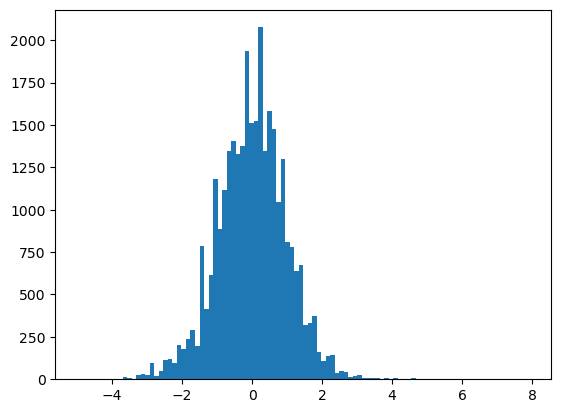

In [74]:
plt.hist(pwt.fit_transform(df[["person_income"]]),bins=100)
plt.show()

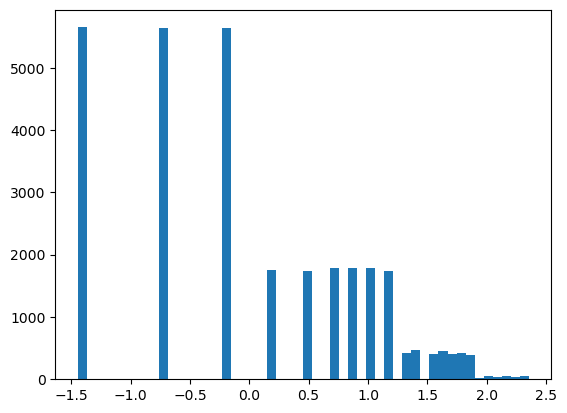

In [75]:
plt.hist(pwt.fit_transform(df[["cb_person_cred_hist_length"]]),bins=50)
plt.show()

<Axes: xlabel='person_income', ylabel='Count'>

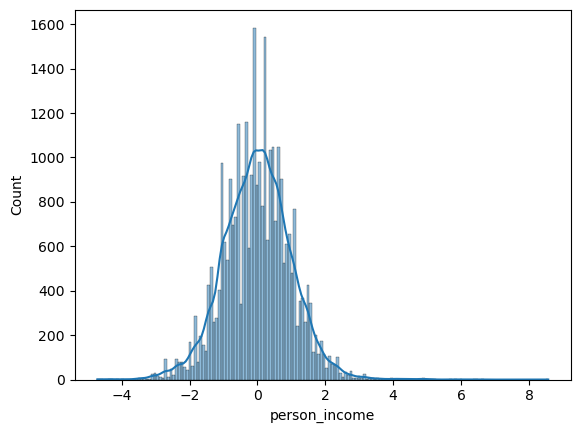

In [78]:
sns.histplot(data, x="person_income", kde=True)

In [79]:
X= data.drop('loan_status', axis=1)
y= data['loan_status']

In [80]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)

<b>Models = {\
    "Logistic Regression": LogisticRegression(),\
    "Random Forest": RandomForestClassifier(),\
    "SVM": SVC(),\
    "XGBoost": XGBClassifier(),\
    "Naive Bayes": GaussianNB(),\
    "Decison Classifier": DecisionTreeClassifier(max_depth=5),\
    "KNN": KNeighborsClassifier(n_neighbors=9),\
    "ab": AdaBoostClassifier(n_estimators=150, estimator=DecisionTreeClassifier(max_depth=5)),\
}</b>

These are the models we are going to use in our project.

In [81]:
model1=LogisticRegression()

In [82]:
model1.fit(X_tr, y_tr)

LogisticRegression()

In [83]:
score1 = model1.score(X_tr, y_tr)# Training score
print(f"Training Accuracy: {score1:.2f}")

Training Accuracy: 0.87


In [84]:
y_pr=model1.predict(X_te)

In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
mean_squared_error(y_te, y_pr)

0.13028627195836046

In [87]:
acc1 = accuracy_score(y_te, y_pr)# Testing score
print(f"Testing Accuracy: {acc1:.2f}")

Testing Accuracy: 0.87


In [88]:
print(classification_report(y_te, y_pr))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4910
           1       0.74      0.54      0.63      1238

    accuracy                           0.87      6148
   macro avg       0.82      0.75      0.77      6148
weighted avg       0.86      0.87      0.86      6148



In [89]:
cm= confusion_matrix(y_pr, y_te)
cm

array([[4677,  568],
       [ 233,  670]])

---------------------------------------

In [90]:
model2=RandomForestClassifier()

In [91]:
model2.fit(X_tr, y_tr)

RandomForestClassifier()

In [92]:
model2.score(X_tr, y_tr)# Training score

0.9999593314083534

In [93]:
y_pr2=model2.predict(X_te)

In [94]:
mean_squared_error(y_te, y_pr2)

0.06929082628497073

In [95]:
acc2 = accuracy_score(y_te, y_pr2)# Testing score
print(f"Testing Accuracy: {acc2:.2f}")

Testing Accuracy: 0.93


In [96]:
print(classification_report(y_te, y_pr2))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4910
           1       0.95      0.69      0.80      1238

    accuracy                           0.93      6148
   macro avg       0.94      0.84      0.88      6148
weighted avg       0.93      0.93      0.93      6148



In [97]:
cm= confusion_matrix(y_pr2, y_te)
cm

array([[4868,  384],
       [  42,  854]])

In [147]:
pred_prob= model2.predict_proba(X_te)[:, 1]

In [151]:
fpr, tpr, th= roc_curve(y_te, pred_prob)

In [152]:
fpr, tpr, th

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.03665988e-04, 4.07331976e-04, 4.07331976e-04,
        8.14663951e-04, 1.01832994e-03, 1.01832994e-03, 1.01832994e-03,
        1.01832994e-03, 1.01832994e-03, 1.22199593e-03, 1.42566191e-03,
        1.62932790e-03, 1.83299389e-03, 2.24032587e-03, 2.44399185e-03,
        2.64765784e-03, 2.85132383e-03, 2.85132383e-03, 3.05498982e-03,
        3.05498982e-03, 3.05498982e-03, 3.05498982e-03, 3.05498982e-03,
        3.46232179e-03, 3.66598778e-03, 3.86965377e-03, 4.68431772e-03,
        4.88798371e-03, 5.09164969e-03, 5.09164969e-03, 5.90631365e-03,
        5.90631365e-03, 6.10997963e-03, 6.51731161e-03, 6.92464358e-03,
        7.53564155e-03, 7.73930754e-03, 9.36863544e-03, 9.97963340e-03,
        1.05906314e-02, 1.18126273e-02, 1.26272912e-02, 1.344195

In [153]:
auc_score=auc(fpr,tpr)

In [155]:
auc_score

0.9300658212937891

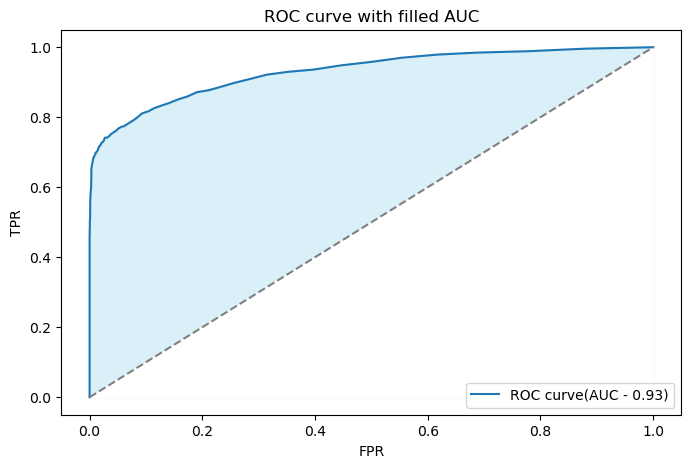

In [157]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label=f"ROC curve(AUC - {auc_score:.2f})")
plt.fill_between(fpr,tpr,color="skyblue", alpha=0.3)
plt.plot([0, 1],[0, 1], ls="--", color="gray")
plt.fill_between([0, 1],[0, 1], color="white")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve with filled AUC")
plt.legend(loc="lower right")
plt.show()

<b>ROC Curve with AUC Interpretation</b>\
This ROC (Receiver Operating Characteristic) curve demonstrates the performance of your classification model.\
    AUC (Area Under Curve) = 0.93



---------------------------------------

In [98]:
model3= SVC()

In [99]:
model3.fit(X_tr, y_tr)

SVC()

In [100]:
score3 = model3.score(X_tr, y_tr)# Training score
print(f"Training Accuracy: {score3:.2f}")

Training Accuracy: 0.92


In [101]:
y_pr3=model3.predict(X_te)

In [102]:
acc3 =accuracy_score(y_te, y_pr3)# Testing score
print(f"Testing Accuracy: {acc3:.2f}")

Testing Accuracy: 0.91


In [103]:
print(classification_report(y_te, y_pr3))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4910
           1       0.91      0.64      0.75      1238

    accuracy                           0.91      6148
   macro avg       0.91      0.81      0.85      6148
weighted avg       0.91      0.91      0.91      6148



In [104]:
cm= confusion_matrix(y_pr3, y_te)
cm

array([[4831,  447],
       [  79,  791]])

-----------------------------------------

In [105]:
model4=XGBClassifier()

In [106]:
model4.fit(X_tr, y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [107]:
score4 = model4.score(X_tr, y_tr)# Training score
print(f"Training Accuracy: {score4:.2f}")

Training Accuracy: 0.96


In [108]:
y_pr4=model4.predict(X_te)

In [109]:
acc4 =accuracy_score(y_te, y_pr4)# Testing score
print(f"Testing Accuracy: {acc4:.2f}")

Testing Accuracy: 0.93


In [110]:
print(classification_report(y_te, y_pr4))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4910
           1       0.94      0.72      0.81      1238

    accuracy                           0.93      6148
   macro avg       0.93      0.85      0.89      6148
weighted avg       0.93      0.93      0.93      6148



In [111]:
cm= confusion_matrix(y_pr4, y_te)
cm

array([[4850,  348],
       [  60,  890]])

------------------------------------------

In [112]:
model5=GaussianNB()

In [113]:
model5.fit(X_tr, y_tr)

GaussianNB()

In [114]:
score5 = model5.score(X_tr, y_tr)# Training score
print(f"Training Accuracy: {score5:.2f}")

Training Accuracy: 0.84


In [115]:
y_pr5=model5.predict(X_te)

In [116]:
acc5 =accuracy_score(y_te, y_pr5)# Testing score
print(f"Testing Accuracy: {acc5:.2f}")

Testing Accuracy: 0.84


In [117]:
print(classification_report(y_te, y_pr5))

              precision    recall  f1-score   support

           0       0.87      0.95      0.90      4910
           1       0.67      0.42      0.51      1238

    accuracy                           0.84      6148
   macro avg       0.77      0.68      0.71      6148
weighted avg       0.83      0.84      0.83      6148



In [118]:
cm= confusion_matrix(y_pr5, y_te)
cm

array([[4654,  722],
       [ 256,  516]])

---------------------------------------

In [119]:
model6=DecisionTreeClassifier(max_depth=5)

In [120]:
model6.fit(X_tr, y_tr)

DecisionTreeClassifier(max_depth=5)

In [121]:
score6 = model6.score(X_tr, y_tr)# Training score
print(f"Training Accuracy: {score6:.2f}")

Training Accuracy: 0.91


In [122]:
y_pr6=model6.predict(X_te)

In [123]:
acc6 =accuracy_score(y_te, y_pr6)# Testing score
print(f"Testing Accuracy: {acc6:.2f}")

Testing Accuracy: 0.90


In [124]:
print(classification_report(y_te, y_pr6))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4910
           1       0.91      0.57      0.70      1238

    accuracy                           0.90      6148
   macro avg       0.91      0.78      0.82      6148
weighted avg       0.90      0.90      0.89      6148



In [125]:
cm= confusion_matrix(y_pr6, y_te)
cm

array([[4840,  527],
       [  70,  711]])

------------------------------------------

In [126]:
model7=KNeighborsClassifier(n_neighbors=9)

In [127]:
model7.fit(X_tr, y_tr)

KNeighborsClassifier(n_neighbors=9)

In [128]:
score7 = model7.score(X_tr, y_tr)# Training score
print(f"Training Accuracy: {score7:.2f}")

Training Accuracy: 0.91


In [129]:
y_pr7=model7.predict(X_te)

In [130]:
acc7 =accuracy_score(y_te, y_pr7)# Testing score
print(f"Testing Accuracy: {acc7:.2f}")

Testing Accuracy: 0.90


In [131]:
print(classification_report(y_te, y_pr7))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      4910
           1       0.84      0.60      0.70      1238

    accuracy                           0.90      6148
   macro avg       0.87      0.79      0.82      6148
weighted avg       0.89      0.90      0.89      6148



In [132]:
cm= confusion_matrix(y_pr7, y_te)
cm


array([[4769,  492],
       [ 141,  746]])

---------------------------------------

In [133]:
model8=AdaBoostClassifier(n_estimators=150, estimator=DecisionTreeClassifier(max_depth=5))

In [134]:
model8.fit(X_tr, y_tr)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=150)

In [135]:
score8 = model6.score(X_tr, y_tr)# Training score
print(f"Training Accuracy: {score8:.2f}")

Training Accuracy: 0.91


In [136]:
y_pr8=model8.predict(X_te)

In [137]:
acc8 =accuracy_score(y_te, y_pr8)# Testing score
print(f"Testing Accuracy: {acc8:.2f}")

Testing Accuracy: 0.93


In [138]:
print(classification_report(y_te, y_pr8))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4910
           1       0.93      0.70      0.80      1238

    accuracy                           0.93      6148
   macro avg       0.93      0.85      0.88      6148
weighted avg       0.93      0.93      0.93      6148



In [139]:
cm= confusion_matrix(y_pr8, y_te)
cm

array([[4846,  367],
       [  64,  871]])

-----------------

### Random Forest Classifier Model has given us the best accuracy....